# Project 3 - Reddit classifier

## Part C) Using GLM to make a upvote predictor model based on available features

In [68]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error,r2_score
%matplotlib inline

In [69]:
pd.options.display.max_rows=2000
pd.options.display.max_columns=4000

In [70]:
beverage = pd.read_csv('../data/beverage_combined.csv')
beverage.head()

,title,score,subreddit,month,hour,characters
0,Perfect job doesn't exi-,8271,0,2,3,24
1,One thing coffee and tea drinkers can agree on...,7908,0,10,2,75
2,4chan's Beginners Guide on Tea,5975,0,4,5,30
3,My buddies like the warmth,4339,0,3,2,26
4,There's no better way to do it. [x-post /r/iran],4317,0,12,5,48


# Objective: To make a GLM to predict scores

In [71]:
# Parameter to fix number of features
max_features_text = 200

In [72]:
# Drop outliers or extremely high scoring posts
beverage.drop(index=beverage.loc[beverage['score']>2000,:].index, axis=0, inplace=True)
beverage.drop(index=beverage.loc[beverage['score']<100,:].index, axis=0, inplace=True)
beverage.reset_index(drop=True, inplace=True)

In [73]:
# Vectorizing the title
# using a token pattern to remove pur numbers: taken from stackoverflow answer of Psidom at the link below:
# https://stackoverflow.com/questions/45981037/sklearn-tf-idf-to-drop-numbers
X = beverage['title']
cvec = CountVectorizer(lowercase=True, stop_words='english', max_df=0.9, max_features=max_features_text, token_pattern='(?ui)\\b\\w*[a-z]+\\w*\\b')
cvec.fit(X)

X = cvec.transform(X)

In [74]:
# Create dataframe from vectorized data and adding other features to it
df = pd.DataFrame(X.toarray(), columns=cvec.get_feature_names())
df = df.merge(beverage[['characters','subreddit','month','hour']], how='left',left_index=True,right_index=True, suffixes=(False,'_beverage'))

In [75]:
# Dummify the class varaibles
try:
    df = pd.get_dummies(df, columns=['subreddit_beverage','month_beverage','hour_beverage'], drop_first=True)
except:
    df = pd.get_dummies(df, columns=['subreddit','month','hour'], drop_first=True)

In [76]:
# Creating matrix and vector for GLM
features = list(df.columns)
X = df[features]
X = sm.add_constant(X)
y = beverage['score']

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [77]:
# Training and testing splits from the data set
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [78]:
# Fitting a Poisson model using log link to our data
model_poisson = sm.GLM(y_train, X_train, 
                      family=sm.families.Poisson(link=sm.families.links.log)).fit()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [79]:
# Summary of the model
model_poisson.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  score   No. Observations:                 1470
Model:                            GLM   Df Residuals:                     1233
Model Family:                 Poisson   Df Model:                          236
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60023.
Date:                Fri, 18 Oct 2019   Deviance:                   1.0842e+05
Time:                        14:57:15   Pearson chi2:                 1.22e+05
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.2632      0.014    439.336      0.000       6.235       6.291
aeropress       0.1683      0.009     18.095      0.000       0.150       0.186
afternoon      -0.1974      0.014    -14.158      0.000      -0.225      -0.170
ago            -0.0672      0.019     -3.576      0.000      -0.104      -0.030
amazing         0.1294      0.016      7.910      0.000       0.097       0.161
art             0.2922      0.020     14.700      0.000       0.253       0.331
away            0.2740      0.020     13.815      0.000       0.235       0.313
bad             0.0271      0.020      1.325      0.185      -0.013       0.067
bag             0.0377      0.016      2.314      0.021       0.006       0.070
barista         0.0623      0.014      4.514      0.000       0.035       0.089
bean           -0.0466      0.027     -1.738      0.082      -0.099       0.006
beans          -0.0537      0.013     -4.157      0.000      -0.079      -0.028
beautiful      -0.0322      0.012     -2.612      0.009      -0.056      -0.008
best            0.0410      0.008      4.847      0.000       0.024       0.058
better         -0.0868      0.015     -5.755      0.000      -0.116      -0.057
birthday        0.1364      0.016      8.737      0.000       0.106       0.167
black          -0.0878      0.010     -8.695      0.000      -0.108      -0.068
blend          -0.3022      0.022    -13.578      0.000      -0.346      -0.259
blue           -0.0726      0.018     -4.105      0.000      -0.107      -0.038
bought         -0.0232      0.012     -1.913      0.056      -0.047       0.001
brew           -0.1111      0.011    -10.356      0.000      -0.132      -0.090
brewed         -0.1080      0.023     -4.763      0.000      -0.152      -0.064
brewing        -0.1629      0.013    -12.119      0.000      -0.189      -0.137
buy            -0.2153      0.018    -12.159      0.000      -0.250      -0.181
caffeine       -0.2231      0.016    -14.253      0.000      -0.254      -0.192
cake           -0.1451      0.016     -9.054      0.000      -0.177      -0.114
came           -0.1140      0.015     -7.787      0.000      -0.143      -0.085
cat            -0.0440      0.015     -2.854      0.004      -0.074      -0.014
chai           -0.2043      0.020    -10.161      0.000      -0.244      -0.165
china          -0.1485      0.015     -9.804      0.000      -0.178      -0.119
chinese         0.0868      0.019      4.658      0.000       0.050       0.123
christmas       0.0960      0.017      5.556      0.000       0.062       0.130
coffee          0.0385      0.003     11.393      0.000       0.032       0.045
cold            0.0306      0.013      2.384      0.017       0.005       0.056
cool           -0.1271      0.014     -8.994      0.000      -0.155      -0.099
cream          -0.0679      0.017     -3.93

In [80]:
# Generate predictions 
preds = model_poisson.predict(X_test)

In [81]:
# Calculate MSE
mean_squared_error(y_test, preds)

71905.5388570373

In [82]:
# r2 score for model
r2_score(y_test, preds)

-0.051285309970881876

In [83]:
beverage.iloc[X_test.index]['score']

1096     545
572      512
450      575
383      617
1489     278
1402     299
128      914
1475     282
824      421
239      731
631      491
1405     301
1116     503
1444     287
744      447
478      557
1010     805
809      430
1262     367
316      655
1013     794
211      772
538      529
111      950
1404     304
900      400
303      662
69      1114
1498     271
733      455
1583     254
715      464
1284     357
1107     527
1414     303
297      670
1366     317
1274     362
1034     709
1629     242
755      442
374      628
366      622
70      1114
56      1161
1303     340
1718     226
926      396
1871     204
352      635
1697     230
394      605
599      504
1503     273
1812     210
1865     203
1587     250
247      726
1938     193
925      394
1429     296
1050     651
1859     206
1575     257
382      618
590      508
471      561
1592     251
433      586
99       988
1067     616
1004     892
993     1097
1055     638
1261     364
1611     243
1726     225

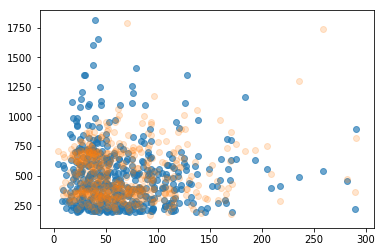

In [84]:
# Comparison of test adn preds
plt.scatter(beverage.iloc[X_test.index]['characters'], beverage.iloc[X_test.index]['score'], alpha = 0.65);
plt.scatter(X_test['characters'],preds, alpha = 0.2);

In [57]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [58]:
X.head()

,const,aeropress,afternoon,ago,amazing,art,away,bad,bag,barista,bean,beans,beautiful,best,better,birthday,black,blend,blue,bought,brew,brewed,brewing,buy,caffeine,cake,came,cat,chai,china,chinese,christmas,coffee,cold,cool,cream,cup,cups,d,day,days,decided,delicious,did,different,does,doing,don,drink,drinking,drip,earl,enjoy,espresso,family,fancy,favorite,feel,filter,finally,free,french,friend,fun,funny,garden,gave,getting,gift,going,good,got,great,green,grey,grinder,guide,guys,hand,happy,help,high,home,homemade,hot,house,ice,iced,james,japan,japanese,just,kettle,keurig,kind,know,latte,leaf,left,let,life,like,little,local,london,look,looks,loose,love,m,machine,make,makes,making,matcha,milk,moka,morning,mug,need,new,nice,old,oolong,party,people,perfect,photo,picked,picture,place,post,pot,pour,press,pretty,puer,r,really,recently,right,roast,roasted,room,s,sale,saw,seen,service,set,setup,share,shelf,shop,shops,shot,small,starbucks,store,sub,summer,t,taiwan,taste,tea,teapot,teas,teaware,thank,thanks,thing,things,think,thought,thrift,time,today,took,tried,try,trying,use,used,v60,ve,video,want,wanted,water,way,week,went,white,wife,work,working,world,x,year,years,yesterday,characters,subreddit_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,43,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [59]:
X.drop(axis=1, columns='const', inplace=True)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [61]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
cross_val_score(lr, X_train, y_train,cv=5)

array([ 1.08488304e-01,  9.74149875e-02, -9.76718913e+18,  5.42826386e-02,
        1.22138958e-01])

In [63]:
lr.score(X_train, y_train)

0.39031033723498737

In [64]:
lr.score(X_test, y_test)

0.06530911828877495

In [65]:
preds = lr.predict(X_test)

In [66]:
mean_squared_error(y_test, preds)

63930.74351630242

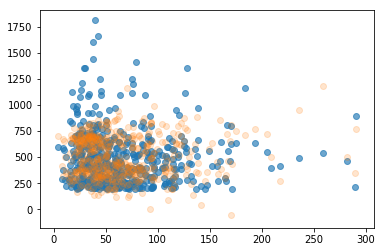

In [67]:
# Comparison of test adn preds
plt.scatter(beverage.iloc[X_test.index]['characters'], beverage.iloc[X_test.index]['score'], alpha = 0.65);
plt.scatter(X_test['characters'],preds, alpha = 0.2);

# Conclusions

##### By ignoring the outliers, our GLM model is capturing the pattern as seen in the scatterplot but obviously the model needs better features. We have also significantly reduced the MSE errors